### 4.3 듀얼 모멘텀 전략

In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import datetime

             Close    Open    High     Low      Volume  Change
Date                                                          
2020-09-24  323.50  321.08  326.75  319.82  76680000.0  0.0027
2020-09-25  328.73  322.63  329.56  321.68  71070000.0  0.0162
2020-09-26  328.73  328.73  328.73  328.73         0.0  0.0000
2020-09-27  328.73  328.73  328.73  328.73         0.0  0.0000
2020-09-28  334.19  333.38  334.89  332.17  64580000.0  0.0166


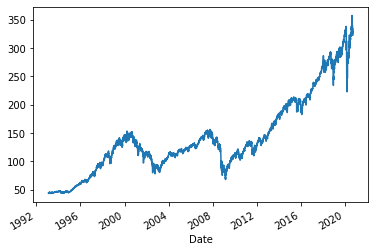

In [2]:
df = fdr.DataReader('SPY', '1993-01-29')
print(df.tail())
df['Close'].plot()

In [5]:
price_df = df[['Close']].copy()
price_df.head()

,Close
Date,
1993-02-01,44.25
1993-02-02,44.34
1993-02-03,44.81
1993-02-04,45.00
1993-02-05,44.97


#### 4.2.4 볼린저 밴드 만들기

In [58]:
# 중간밴드(이동평균선)
price_df['center'] = price_df['Close'].rolling(window = 20).mean()
price_df.iloc[18:25]

,Close,center
Date,,
1997-06-11,1.54,NaN
1997-06-12,1.60,1.5755
1997-06-13,1.58,1.5565
1997-06-16,1.57,1.5485
1997-06-17,1.51,1.5385
1997-06-18,1.51,1.5320
1997-06-19,1.51,1.5360


In [59]:
price_df['ub'] = price_df['center'] + 2 * price_df['Close'].rolling(window = 20).std()
price_df.iloc[18:25]

,Close,center,ub
Date,,,
1997-06-11,1.54,NaN,NaN
1997-06-12,1.60,1.5755,1.836951
1997-06-13,1.58,1.5565,1.745489
1997-06-16,1.57,1.5485,1.719229
1997-06-17,1.51,1.5385,1.691955
1997-06-18,1.51,1.5320,1.678194
1997-06-19,1.51,1.5360,1.674625


In [60]:
price_df['lb'] = price_df['center'] - 2 * price_df['Close'].rolling(window = 20).std()
price_df.iloc[18:25]

,Close,center,ub,lb
Date,,,,
1997-06-11,1.54,NaN,NaN,NaN
1997-06-12,1.60,1.5755,1.836951,1.314049
1997-06-13,1.58,1.5565,1.745489,1.367511
1997-06-16,1.57,1.5485,1.719229,1.377771
1997-06-17,1.51,1.5385,1.691955,1.385045
1997-06-18,1.51,1.5320,1.678194,1.385806
1997-06-19,1.51,1.5360,1.674625,1.397375


In [61]:
# 볼린져밴드 함수
n = 20
sigma = 2

def bollinger_band(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Close'].rolling(n).mean()                    # 중앙 이동평균선
    bb['ub'] = bb['center'] + sigma * price_df['Close'].rolling(n).std()  # 상단밴드
    bb['lb'] = bb['center'] - sigma * price_df['Close'].rolling(n).std()  # 상단밴드
    return bb

bollinger = bollinger_band(price_df, n, sigma)

In [62]:
base_date = '2009-01-02'
sample = bollinger.loc[base_date:]    # 이방법으로 이동평균 생성시 발생하는 결측치 삭제도 가능
sample.head()

,Close,center,ub,lb
Date,,,,
2009-01-02,54.36,50.7840,54.317714,47.250286
2009-01-05,54.06,51.1210,54.547687,47.694313
2009-01-06,57.36,51.5760,55.740377,47.411623
2009-01-07,56.20,51.8155,56.462656,47.168344
2009-01-08,57.16,52.1110,57.323915,46.898085


In [77]:
# 함수화
def create_trade_book(sample):
    book = sample[['Close']].copy()
    book['trade'] = ''
    retrun(book)

# 거래내역 기록할 장부 작성
book = sample[['Close']].copy()
book['trade'] = ''   # 거래내역 컬럼
book.head()

,Close,trade
Date,,
2009-01-02,54.36,
2009-01-05,54.06,
2009-01-06,57.36,
2009-01-07,56.20,
2009-01-08,57.16,


#### 4.2.5 거래 전략

In [78]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Close'] > sample.loc[i, 'ub']:   # 상단 밴드 이탈 시 동작 안함
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Close']:  # 하단 밴드 이탈 시 매수
            if book.shift(1).loc[i, 'trade'] == 'buy':      # 이미 매수 상태이면
                book.loc[i, 'trade'] = 'buy'                # 매수상태 유지
            else:
                book.loc[i, 'trade'] = 'buy'
        elif sample.loc[i, 'ub'] >= sample.loc[i, 'Close'] and sample.loc[i, 'Close'] >= sample.loc[i, 'lb']:   # 볼린져 밴드 안에 있을 시
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'                #매수상태 유지
            else:
                book.loc[i, 'trade'] = ''
    return(book)

In [79]:
book = tradings(sample, book)
book.tail(10)

,Close,trade
Date,,
2020-09-15,3156.13,
2020-09-16,3078.10,
2020-09-17,3008.73,
2020-09-18,2954.91,
2020-09-21,2960.47,
2020-09-22,3128.99,
2020-09-23,2999.86,
2020-09-24,3019.79,
2020-09-25,3095.13,


#### 4.2.6 전략 수익률

In [100]:
def returns(book):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        # long 진입
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':
            buy = book.loc[i, 'Close']
            print('진입일 : ', i, 'long 진입가격 : ', buy)
        # long 청산
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] =='buy':
            sell = book.loc[i, 'Close']
            rtn = (sell - buy) / buy + 1  # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ', i, 'long 진입가격 : ', buy, ' | long 청산가격 : ', sell, ' | return: ', round(rtn, 4))
            
        if book.loc[i, 'trade'] == '':  # 제로 포지션
            buy = 0.0
            sell = 0.0
            
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn   # 누적 수익률 계산
        book.loc[i, 'acc_return'] = acc_rtn
        
    print('Accunulated return : ', round(acc_rtn, 4))
#     return (round(acc_rtn, 4))
    return(book)

In [101]:
imsi = returns(book)

진입일 :  2009-05-13 00:00:00 long 진입가격 :  74.19
청산일 :  2009-06-01 00:00:00 long 진입가격 :  74.19  | long 청산가격 :  83.05  | return:  1.1194
진입일 :  2009-07-07 00:00:00 long 진입가격 :  75.63
청산일 :  2009-07-20 00:00:00 long 진입가격 :  75.63  | long 청산가격 :  88.23  | return:  1.1666
진입일 :  2009-08-31 00:00:00 long 진입가격 :  81.19
청산일 :  2009-09-16 00:00:00 long 진입가격 :  81.19  | long 청산가격 :  90.7  | return:  1.1171
진입일 :  2010-05-04 00:00:00 long 진입가격 :  129.83
청산일 :  2010-08-04 00:00:00 long 진입가격 :  129.83  | long 청산가격 :  127.58  | return:  0.9827
진입일 :  2010-11-16 00:00:00 long 진입가격 :  157.78
청산일 :  2010-11-24 00:00:00 long 진입가격 :  157.78  | long 청산가격 :  177.25  | return:  1.1234
진입일 :  2011-01-21 00:00:00 long 진입가격 :  177.42
청산일 :  2011-03-30 00:00:00 long 진입가격 :  177.42  | long 청산가격 :  179.42  | return:  1.0113
진입일 :  2011-06-06 00:00:00 long 진입가격 :  185.69
청산일 :  2011-06-27 00:00:00 long 진입가격 :  185.69  | long 청산가격 :  201.25  | return:  1.0838
진입일 :  2011-08-04 00:00:00 long 진입가격 :  201.48
청산일 :  2011

#### 4.2.7 변화 추이

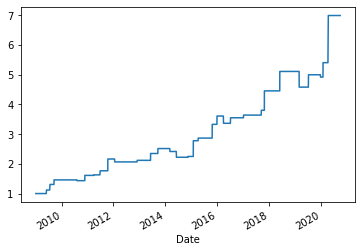

In [104]:
import matplotlib.pylab as plt
book['acc_return'].plot()